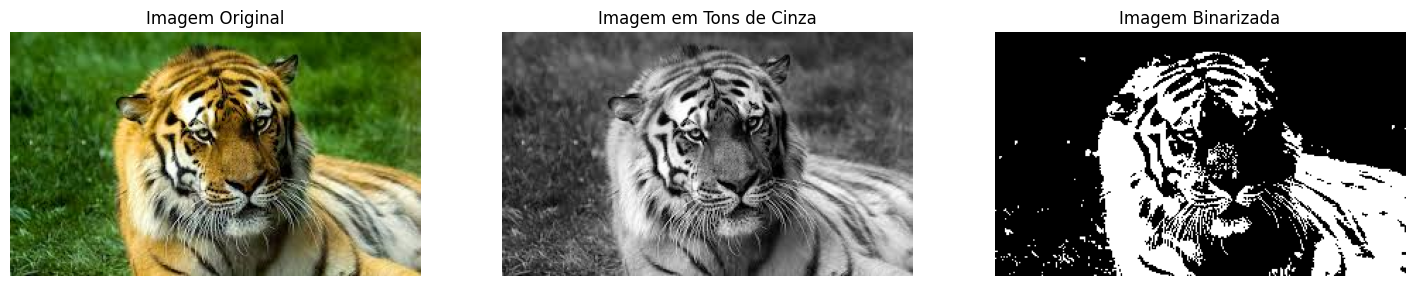

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

# Carregar a imagem
img = mpimg.imread('/content/images.jpeg')

# Verificar as dimensões da imagem
altura, largura, canais = img.shape

# Transformar para escala de cinza usando a fórmula: Y = 0.299*R + 0.587*G + 0.114*B
imagem_cinza = np.dot(img[...,:3], [0.299, 0.587, 0.114])

# Agora, vamos binarizar a imagem. O limiar será 128 (meio de 0 a 255)
imagem_binaria = np.where(imagem_cinza > 128, 255, 0)

# Exibir as imagens
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Exibir a imagem original
axes[0].imshow(img)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

# Exibir a imagem em tons de cinza
axes[1].imshow(imagem_cinza, cmap='gray')
axes[1].set_title("Imagem em Tons de Cinza")
axes[1].axis('off')

# Exibir a imagem binarizada
axes[2].imshow(imagem_binaria, cmap='gray')
axes[2].set_title("Imagem Binarizada")
axes[2].axis('off')

plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

# Função para carregar imagem JPEG
def load_jpeg(filename):
    img = mpimg.imread(filename)
    return img

# Função para salvar a imagem em formato PGM (escala de cinza)
def save_pgm(filename, width, height, data):
    with open(filename, "wb") as f:
        f.write(f"P5\n{width} {height}\n255\n".encode())
        f.write(bytearray(data))

# Função para converter RGB para escala de cinza
def rgb_to_grayscale(data):
    grayscale = []
    for i in range(0, len(data), 3):
        r, g, b = data[i], data[i + 1], data[i + 2]
        gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Conversão ponderada
        grayscale.append(gray)
    return grayscale

# Função para binarizar a imagem (limiar 128)
def binarize(grayscale, threshold=128):
    return [255 if pixel >= threshold else 0 for pixel in grayscale]

# Função principal
def main():
    input_file = "/content/images.jpeg"  # Nome da imagem de entrada
    grayscale_file = "imagem_grayscale.pgm"
    binary_file = "imagem_binary.pgm"

    # Carregar a imagem JPEG
    img = load_jpeg(input_file)
    height, width, _ = img.shape

    # Converter para escala de cinza
    grayscale_data = rgb_to_grayscale(img.flatten())

    # Salvar a imagem em tons de cinza no formato PGM
    save_pgm(grayscale_file, width, height, grayscale_data)

    # Binarizar a imagem
    binary_data = binarize(grayscale_data)

    # Salvar a imagem binarizada no formato PGM
    save_pgm(binary_file, width, height, binary_data)

    print("Conversão concluída! Imagens salvas como PGM.")

# Executar a função principal
if __name__ == "__main__":
    main()


Conversão concluída! Imagens salvas como PGM.
